/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


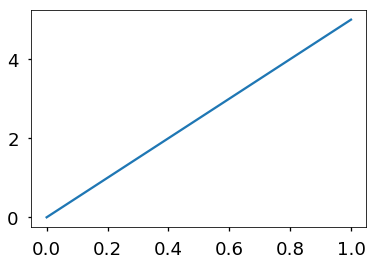

In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk", font_scale = 1.4)
X = np.linspace(0.,1, 2)[:,None]
X_prime = np.linspace(0, 1, 20)[:,None]
Y = 5*X

plt.plot(X, Y)

In [2]:
import sys
sys.path.append('../')
from GPMonotone.ker_w_der import ExtendRBF1D
from GPMonotone.monotone_gpmc import MonotoneGPMC

In [3]:
K = ExtendRBF1D()

In [4]:
m = MonotoneGPMC(X, Y, X_prime)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [5]:
m.kern.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m

Name,values,prior,constraint
monotonic_model.V,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
monotonic_model.kern.lengthscale,[1.],"Ga([1.],[1.])",+ve
monotonic_model.kern.signal_variance,[1.],"Ga([1.],[1.])",+ve
monotonic_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [6]:
m.optimize(maxiter=150) # start near MAP

      fun: array([26.04798482])
 hess_inv: <24x24 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.92099363e-06,  3.51422776e-05, -5.16833325e-07,  1.59440729e-06,
        5.96065640e-07,  3.79499922e-07,  2.01730625e-07,  1.43353932e-07,
        1.22790053e-07,  1.02979745e-07,  7.58706146e-08,  4.70081862e-08,
        1.94801877e-08, -9.55872547e-09, -4.58718476e-08, -9.40544828e-08,
       -1.47566009e-07, -1.76445968e-07, -1.53958888e-07, -1.00968537e-07,
       -5.26192116e-08, -2.11884868e-08, -9.39697160e-06,  1.42167822e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 66
      nit: 40
   status: 0
  success: True
        x: array([ 7.31350140e-04,  2.64295116e+00, -5.16833325e-07,  1.59440729e-06,
        5.96065640e-07,  3.79499922e-07,  2.01730625e-07,  1.43353932e-07,
        1.22790053e-07,  1.02979745e-07,  7.58706146e-08,  4.70081862e-08,
        1.94801877e-08, -9.55872547e-09, -4.58718476e-08, -9.40544828e-08,
       -1.47566009e

In [7]:
m

Name,values,prior,constraint
monotonic_model.V,[[ 7.31350140e-04] [ 2.64295116e+00] [-5.16833325e-07] [ 1.59440729e-06] [ 5.96065640e-07] [ 3.79499922e-07] [ 2.01730625e-07] [ 1.43353932e-07] [ 1.22790053e-07] [ 1.02979745e-07] [ 7.58706146e-08] [ 4.70081862e-08] [ 1.94801877e-08] [-9.55872547e-09] [-4.58718476e-08] [-9.40544828e-08] [-1.47566009e-07] [-1.76445968e-07] [-1.53958888e-07] [-1.00968537e-07] [-5.26192116e-08] [-2.11884868e-08]],"N([0.],[1.])",(none)
monotonic_model.kern.lengthscale,[0.46522141],"Ga([1.],[1.])",+ve
monotonic_model.kern.signal_variance,[3.59417256],"Ga([1.],[1.])",+ve
monotonic_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [8]:
samples = m.sample(500, Lmax = 20, epsilon = 0.01, thin = 5, burn = 1000, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  90.0 %
Iteration:  200 	 Acc Rate:  70.0 %
Iteration:  300 	 Acc Rate:  78.0 %
Iteration:  400 	 Acc Rate:  98.0 %
Iteration:  500 	 Acc Rate:  88.0 %
Iteration:  600 	 Acc Rate:  97.0 %
Iteration:  700 	 Acc Rate:  84.0 %
Iteration:  800 	 Acc Rate:  99.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  92.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  81.0 %
Iteration:  200 	 Acc Rate:  62.0 %
Iteration:  300 	 Acc Rate:  94.0 %
Iteration:  400 	 Acc Rate:  79.0 %
Iteration:  500 	 Acc Rate:  94.0 %
Iteration:  600 	 Acc Rate:  87.0 %
Iteration:  700 	 Acc Rate:  87.0 %
Iteration:  800 	 Acc Rate:  93.0 %
Iteration:  900 	 Acc Rate:  89.0 %
Iteration:  1000 	 Acc Rate:  96.0 %
Iteration:  1100 	 Acc Rate:  98.0 %
Iteration:  1200 	 Acc Rate:  98.0 %
Iteration:  1300 	 Acc Rate:  88.0 %
Iteration:  1400 	 Acc Rate:  76.0 %
Iteration:  1500 	 Acc Rate:  84.0 %
Iteration:  1600 	 Acc Rate:  88.0 %
Iterati

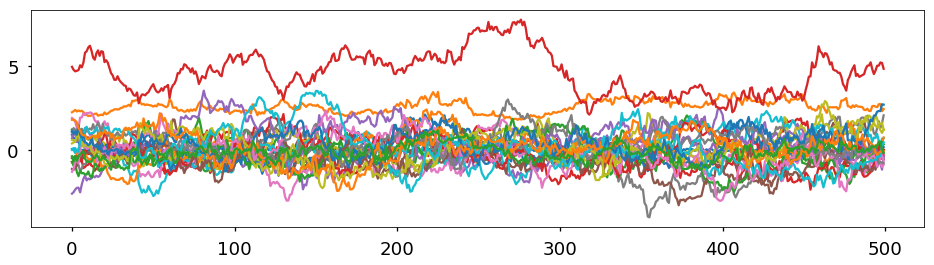

In [9]:
plt.figure(figsize=(16, 4))
plt.plot(samples)

In [10]:
sample_df = m.get_samples_df(samples)
sample_df.head()

,monotonic_model.V,monotonic_model.kern.lengthscale,monotonic_model.kern.signal_variance,monotonic_model.likelihood.noise_variance
0,"[[0.046057908050768974], [2.2364513903797634],...",[0.5244682426470398],[4.936166787096048],[0.01]
1,"[[0.06294758099254012], [2.298061311572495], [...",[0.40713722606344094],[4.759607755599192],[0.01]
2,"[[0.023163752506060387], [2.377162433497406], ...",[0.5358789027953442],[4.6733984713946635],[0.01]
3,"[[-0.05709159348075195], [2.282490297326444], ...",[0.4159252407488455],[4.704754630848243],[0.01]
4,"[[-0.036855246328178534], [2.340040589512942],...",[0.5265437287180815],[4.7460410426858415],[0.01]


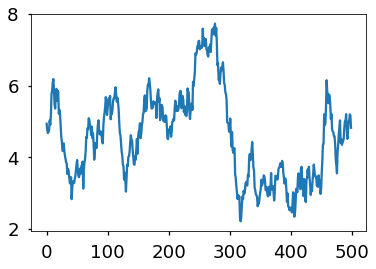

In [11]:
plt.plot(sample_df['monotonic_model.kern.signal_variance'])

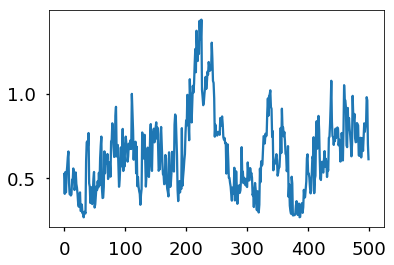

In [12]:
plt.plot(sample_df['monotonic_model.kern.lengthscale'])

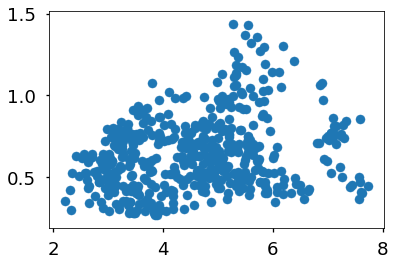

In [13]:
plt.scatter(sample_df['monotonic_model.kern.signal_variance'], sample_df['monotonic_model.kern.lengthscale'])

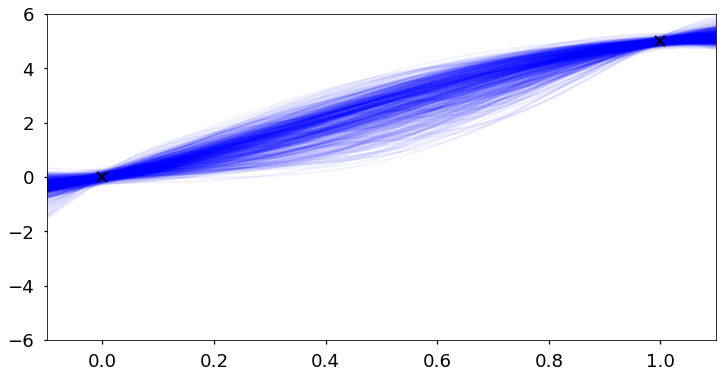

In [15]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 1)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-6, 6)